# **Проект 1 для экстерна по Python**

# **Первичный анализ данных**

Начнем с загрузки датасета

In [ ]:
import pandas as pd

df = pd.read_csv("survey_results_public_2023.csv")
DF = pd.read_csv("survey_results_public_2023.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'survey_results_public_2023.csv'

1. Разница объясняется достаточно просто. В колонке CompTotal мы видим значения в валютах до перевода всех значений к эквивалентому, из-за этого у нас появляются зарплаты больших порядков.
2. Среднее значение может отличаться от медианного, потому что медиана показывает значения, меньше которого половина значений выборки. Среднее показывает среднее арифметическое выборки. Из-за очень больших значений среднее может сильно может отличаться от мадианы, так как это всего одно значение для медианы, но большое изменение для среднего.
3. Проходя анкету, одни и те же люди не отвечали на одни и те же вопросы. Если не укзана зарпалата в оригинальной валюте, то и в конвертированной значений мы не увидим.
4. Мы можем заменить пустые значения, используя df.fillna(), df.apply(). Можно использовать первый метод, чтобы заменить значения NaN на, например, медиану или среднее, для df.apply() можно расширять функционал и заменить другие значения, например, отрицательные

In [ ]:
df.describe().style.format(precision = 0)

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184,48225,43579,48019
mean,44592,1036806635562467391394372602402550216392704,11,103110
std,25745,227684720124324374955124620267587368424308736,9,681419
min,1,0,0,1
25%,22297,63000,5,43907
50%,44592,115000,9,74963
75%,66888,230000,16,121641
max,89184,49999999999999992051087350427974655758076739584,50,74351432


Дополнительно посмотрим на самые большие значения зарплат в выборке, которые больше всего влияют на среднее

In [ ]:
df[df["CompTotal"].notna()][["CompTotal", "ConvertedCompYearly"]].sort_values("CompTotal").tail(10).style.format(precision = 0)

,CompTotal,ConvertedCompYearly
9175,18401992801,nan
56853,19800000000,467725
19679,22396718426,36573181
33078,100000000000,2362249
15439,4567886688856,nan
35779,1000000000000000,nan
43556,10000000000000000,nan
49553,10000000000000000,nan
18463,1000000000000000000000,nan
56322,49999999999999992051087350427974655758076739584,nan


# **Анализ пропущенных значений в выборке**

In [ ]:
import seaborn as sns
import missingno as msno
%matplotlib inline

Text(0.5, 1.0, 'Распределение непустых значений по столбцам в выборке')

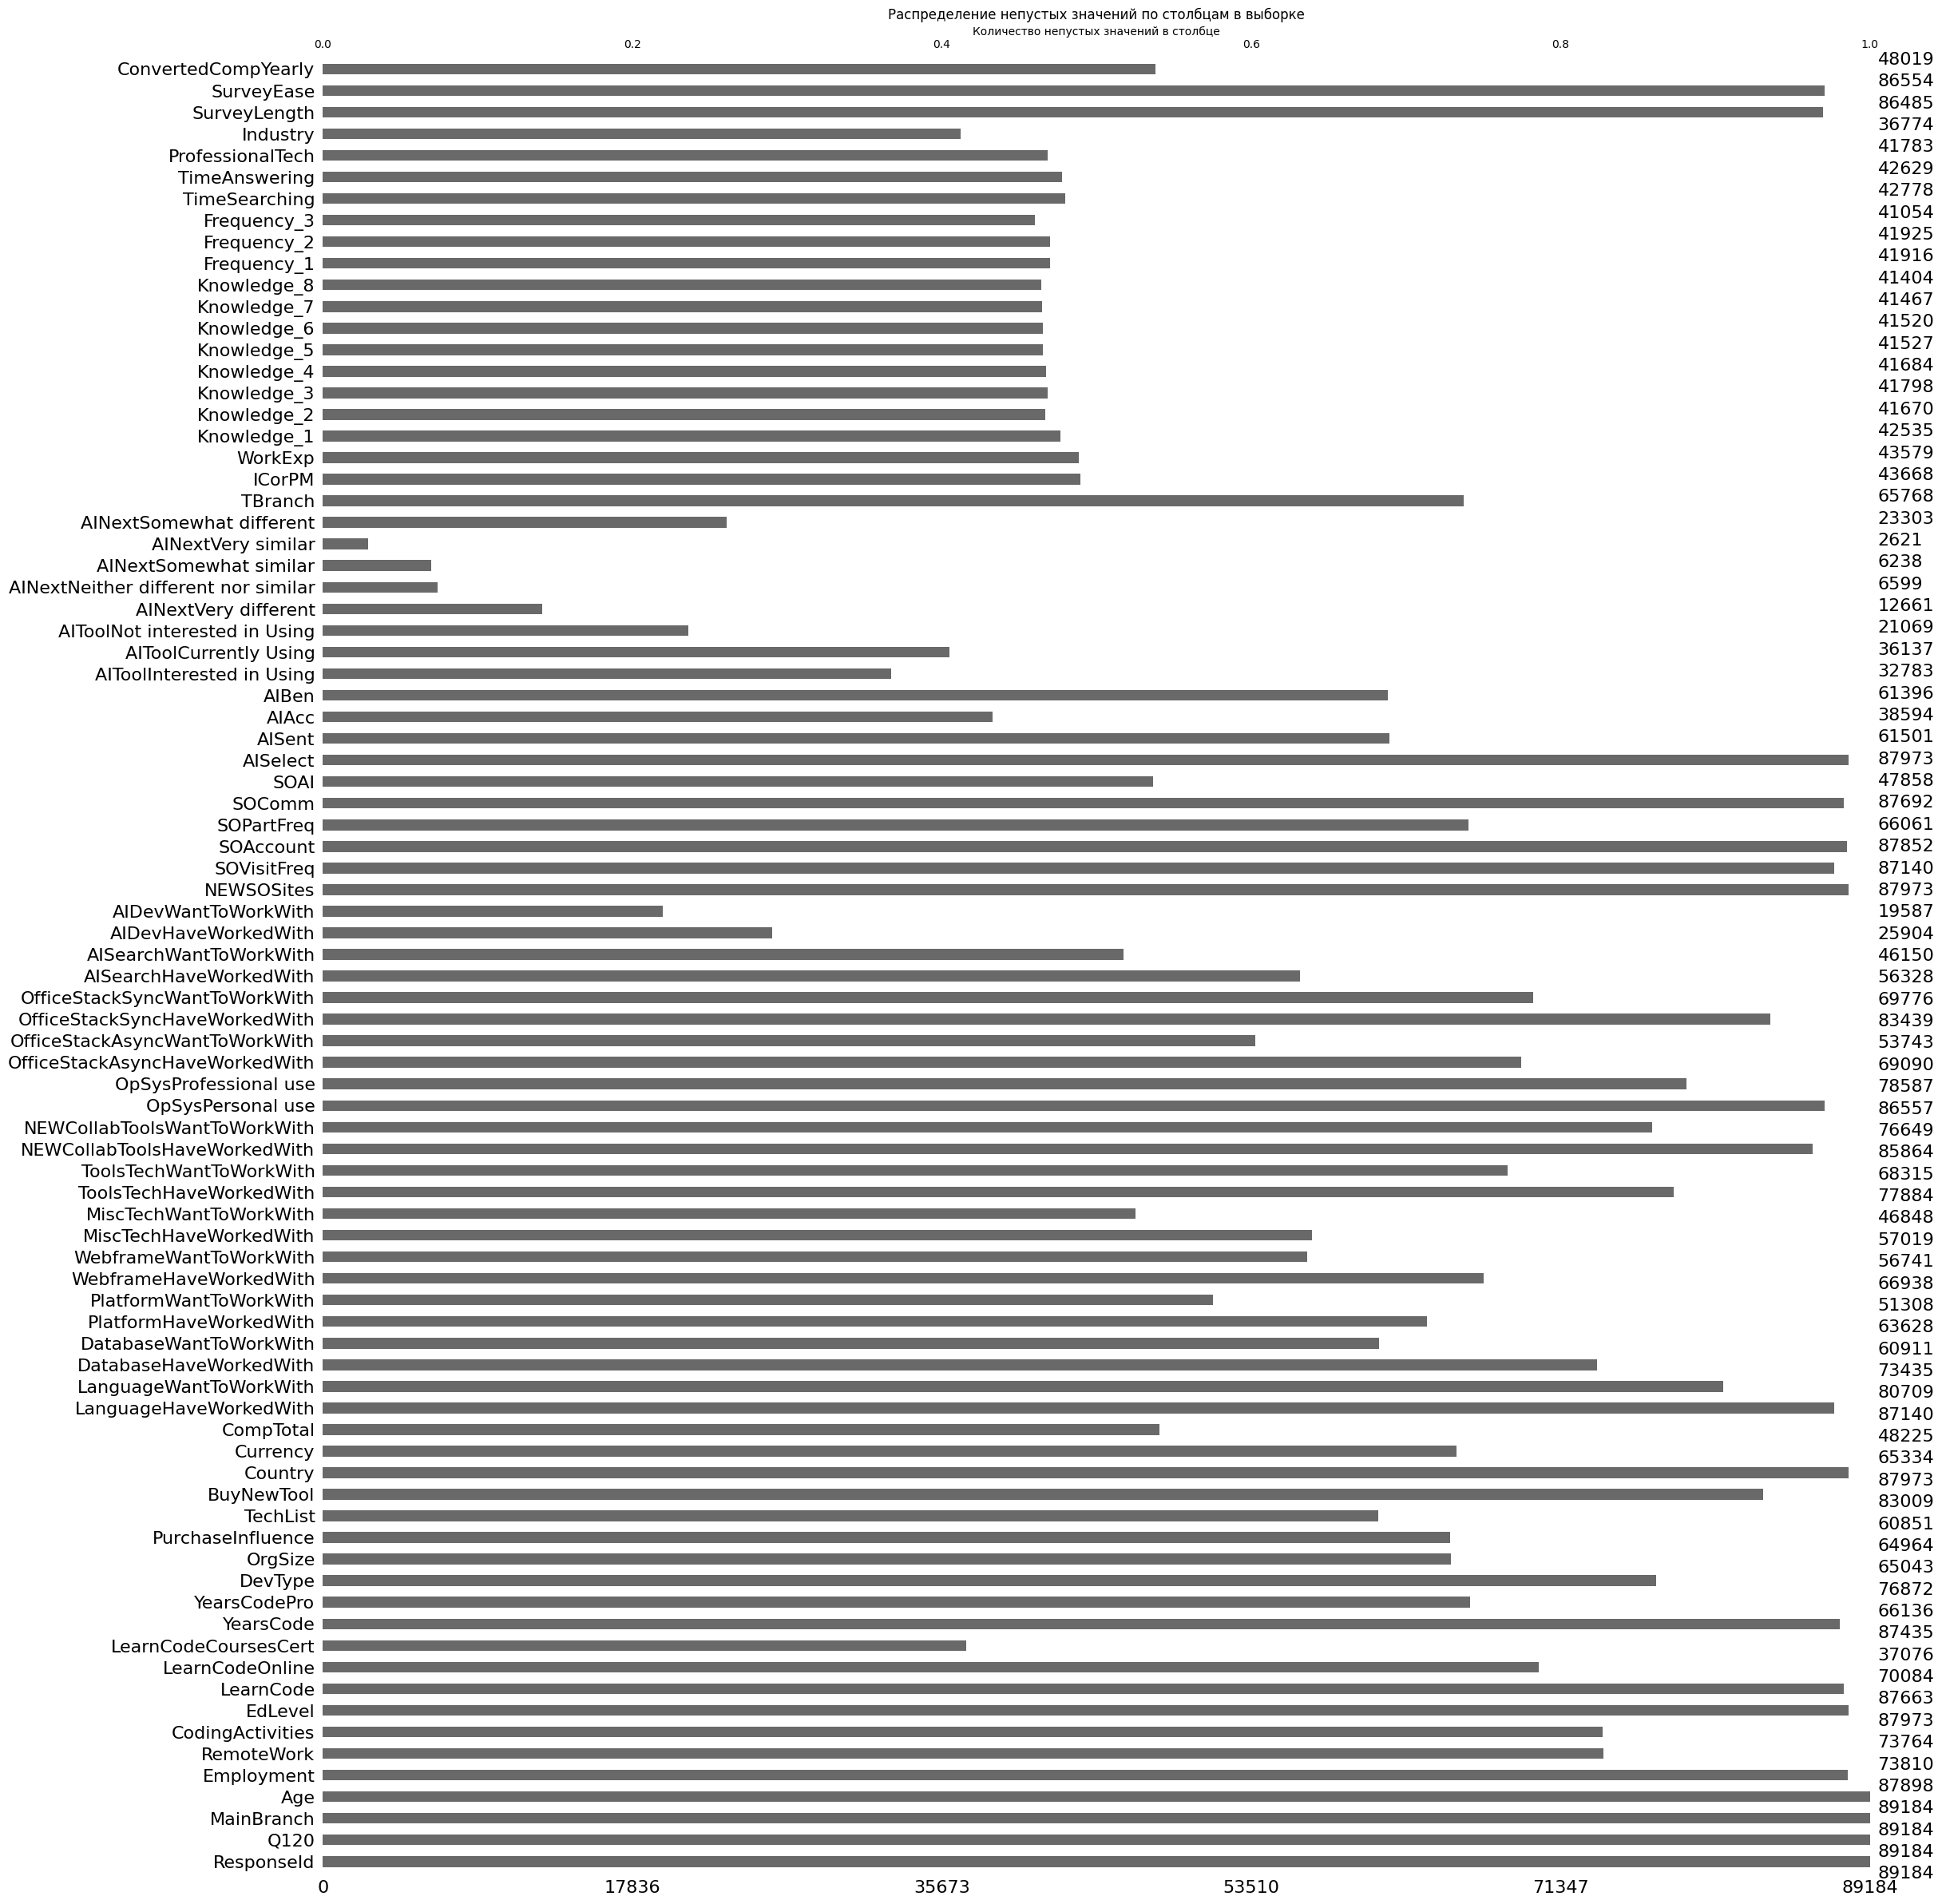

In [ ]:
import matplotlib.pyplot as plt

msno.bar(df)
plt.xlabel("Количество непустых значений в столбце")
plt.ylabel("Названия столбцов")
plt.title("Распределение непустых значений по столбцам в выборке")

Мы видим определенные столбцы, в которых значений меньше 50%. Это столбцы, отвечающие за вопросы о индустрии, знаний респондента, частоте ответов и времени прохождения.

Около 67% процентов респондентов отвечали на перечень вопросов о предпочтении утилит, таких как язык программирования, база данных, платформа.

Text(0.5, 1.0, 'Распределение столбцов по количеству непустых значений')

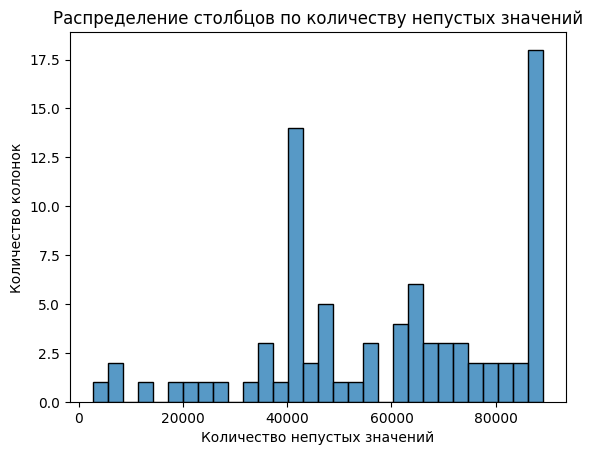

In [ ]:
sns.histplot([df.shape[0] - df[name].isnull().sum() for name in df.columns], bins = 30)
plt.ylabel("Количество колонок")
plt.xlabel("Количество непустых значений")
plt.title("Распределение столбцов по количеству непустых значений")

Отсюда мы также видим, что большинство столбцов имеют все поля заполненными(самое правое значение).

Большáя часть значений имеет примерно половину записей от числа всех респондентов. В остальных значений встречаются до 5 столбцов, в которых было дано непустое количество ответов, равное числу на оси абсцисс

Одним из способов работы с такими значениями будет игнорирование данных с пропусками. Это необходимо делать не всегда, а лишь при анализа значений, в которых присутствуют данные признаки

# **Анализ способов изучения программирования**

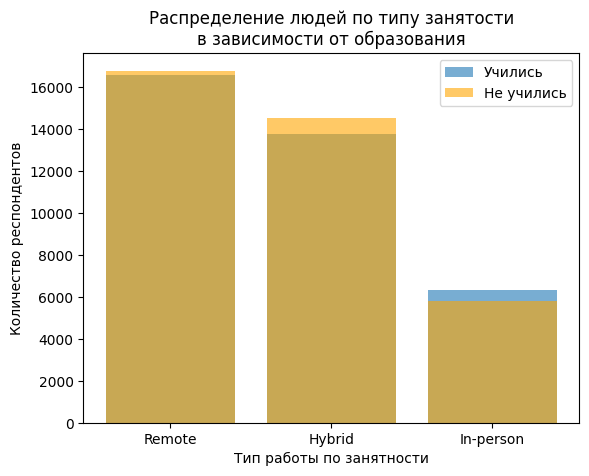

In [ ]:
def learnt_coding_education(df):
  # Если эти слова включаются в опыте обучения, то респондент
  # в новой колонке LearnCodeInSchool получит значение "Yes"

  education_organizations = ["School","University","College"]
  education_organizations = education_organizations + [element.lower() for element in education_organizations]

  got_education = lambda x: any(x.count(education_organizations[i]) for i in range(len(education_organizations)))
  return df["LearnCode"].apply(lambda x:"Yes" if got_education(str(x)) else "No")

df["LearnCodeInSchool"] = learnt_coding_education(df)
names = df["RemoteWork"].dropna().unique() # Наименования типов работы для графика
names[1] = "Hybrid"

plt.bar(names,df[df["LearnCodeInSchool"] == "Yes"]["RemoteWork"].value_counts(),alpha=0.6, label = "Учились")
plt.bar(names,df[df["LearnCodeInSchool"] == "No"]["RemoteWork"].value_counts(), color = "orange",alpha=0.6,label="Не учились")

plt.xlabel("Тип работы по занятности")
plt.ylabel("Количество респондентов")
plt.title("Распределение людей по типу занятости\nв зависимости от образования")
plt.legend()

Отсюда можно сделать вывод, что наличие образвования не влияет на тип занятости респондента, во всех трех типах занятости количество респондентов примерно одно и то же, притом, что в целом в выборке их практически равное количество

Text(0.5, 1.0, 'Зависимость заработной платы от опыта работы')

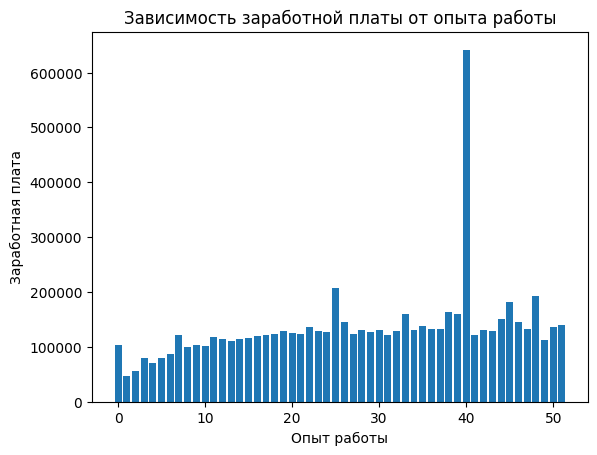

In [ ]:
import numpy as np

tmp = df.groupby("YearsCodePro")["ConvertedCompYearly"].mean()
tmp.index = np.array(list(tmp.index[:-2]) + [0,51]).astype(int)
tmp = tmp.sort_index()
plt.bar(tmp.index, tmp)
plt.xlabel("Опыт работы")
plt.ylabel("Заработная плата")
plt.title("Зависимость заработной платы от опыта работы")

In [ ]:
#tmp = tmp.reset_index()
corr = tmp["index"].corr(tmp["ConvertedCompYearly"])
print(f"Коэффициент корреляции между опытом работы и заработной платой: {round(corr,2)}")

Коэффициент корреляции между опытом работы и заработной платой: 0.39


Воспользуемся шкалой Чеддока для оценки корреляции. Значения от 0,3 до 0,5 считаются по этой шкале слабой корреляцией и значения нет прямой связи между опытом работы и размером заработной платы.

# **Анализ уровня образования и заработной платы в разных странах**

<ipython-input-356-cc6cc57d94b9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(names, df_top10[df["Country"] == top10[i]]["EdLevel"].value_counts(), alpha=0.5,label = top10[i])
<ipython-input-356-cc6cc57d94b9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(names, df_top10[df["Country"] == top10[i]]["EdLevel"].value_counts(), alpha=0.5,label = top10[i])
<ipython-input-356-cc6cc57d94b9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(names, df_top10[df["Country"] == top10[i]]["EdLevel"].value_counts(), alpha=0.5,label = top10[i])
<ipython-input-356-cc6cc57d94b9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.bar(names, df_top10[df["Country"] == top10[i]]["EdLevel"].value_counts(), alpha=0.5,label = top10[i])
<ipython-input-356-cc6cc57d94b9>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p

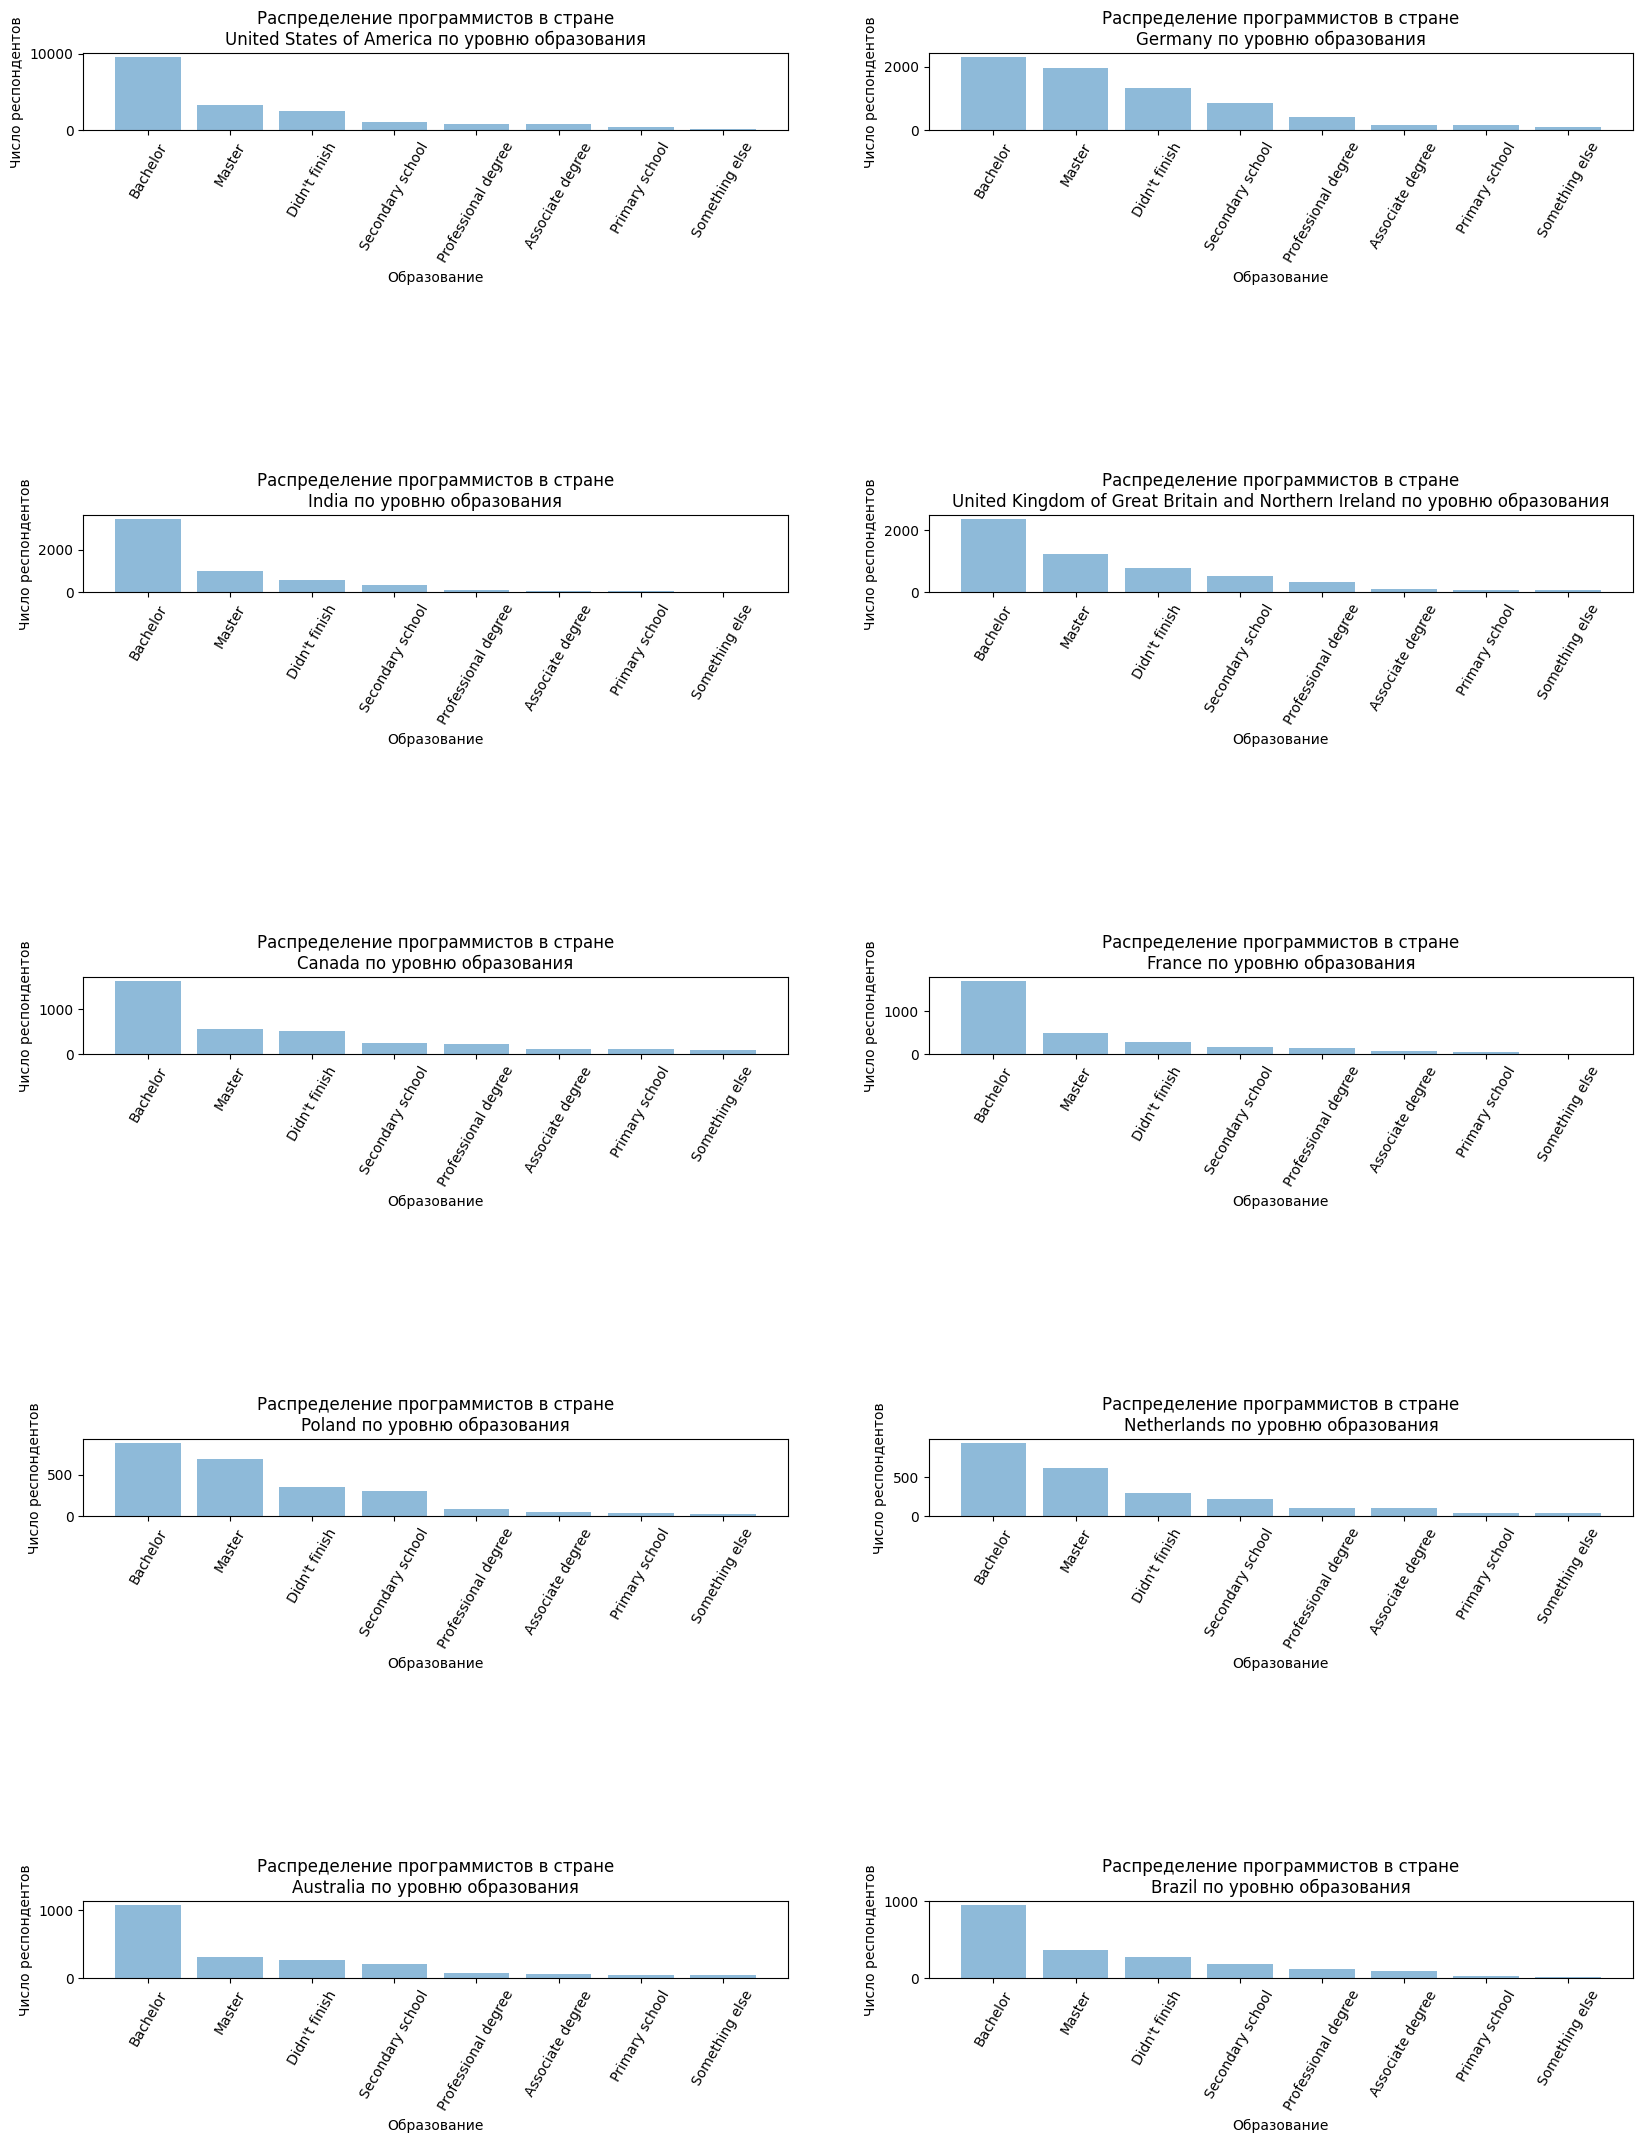

In [ ]:
top10 = list(df["Country"].value_counts().head(10).index)
df_top10 = df[df["Country"].apply(lambda x: x in top10)]


names = ["Bachelor", "Master", "Didn't finish", "Secondary school","Professional degree",
         "Associate degree","Primary school","Something else"]


plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace = 5)

for i in range(10):
  plt.subplot(5, 2, i+1)
  plt.bar(names, df_top10[df["Country"] == top10[i]]["EdLevel"].value_counts(), alpha=0.5,label = top10[i])

  plt.xticks(rotation = 60)
  plt.ylabel("Число респондентов")
  plt.xlabel("Образование")
  plt.title(f"Распределение программистов в стране\n{top10[i]} по уровню образования")

В топ-10 странах везде мы видим скошенное вправо распределение частот образования в заданной последовательности. Она не идет в отсортированном порядке.

После бакалавриата идет магистратура, после встрчается средняя школа, после профессиональная степень и т.п.

Поэтому мы не можем заявлять, что раз выборка скошенна вправо, то у большего числа людей худшее образование. Это не так, так как наша выборка не отсортирована.

Тенденция наблюдается во всех топ-10 странах

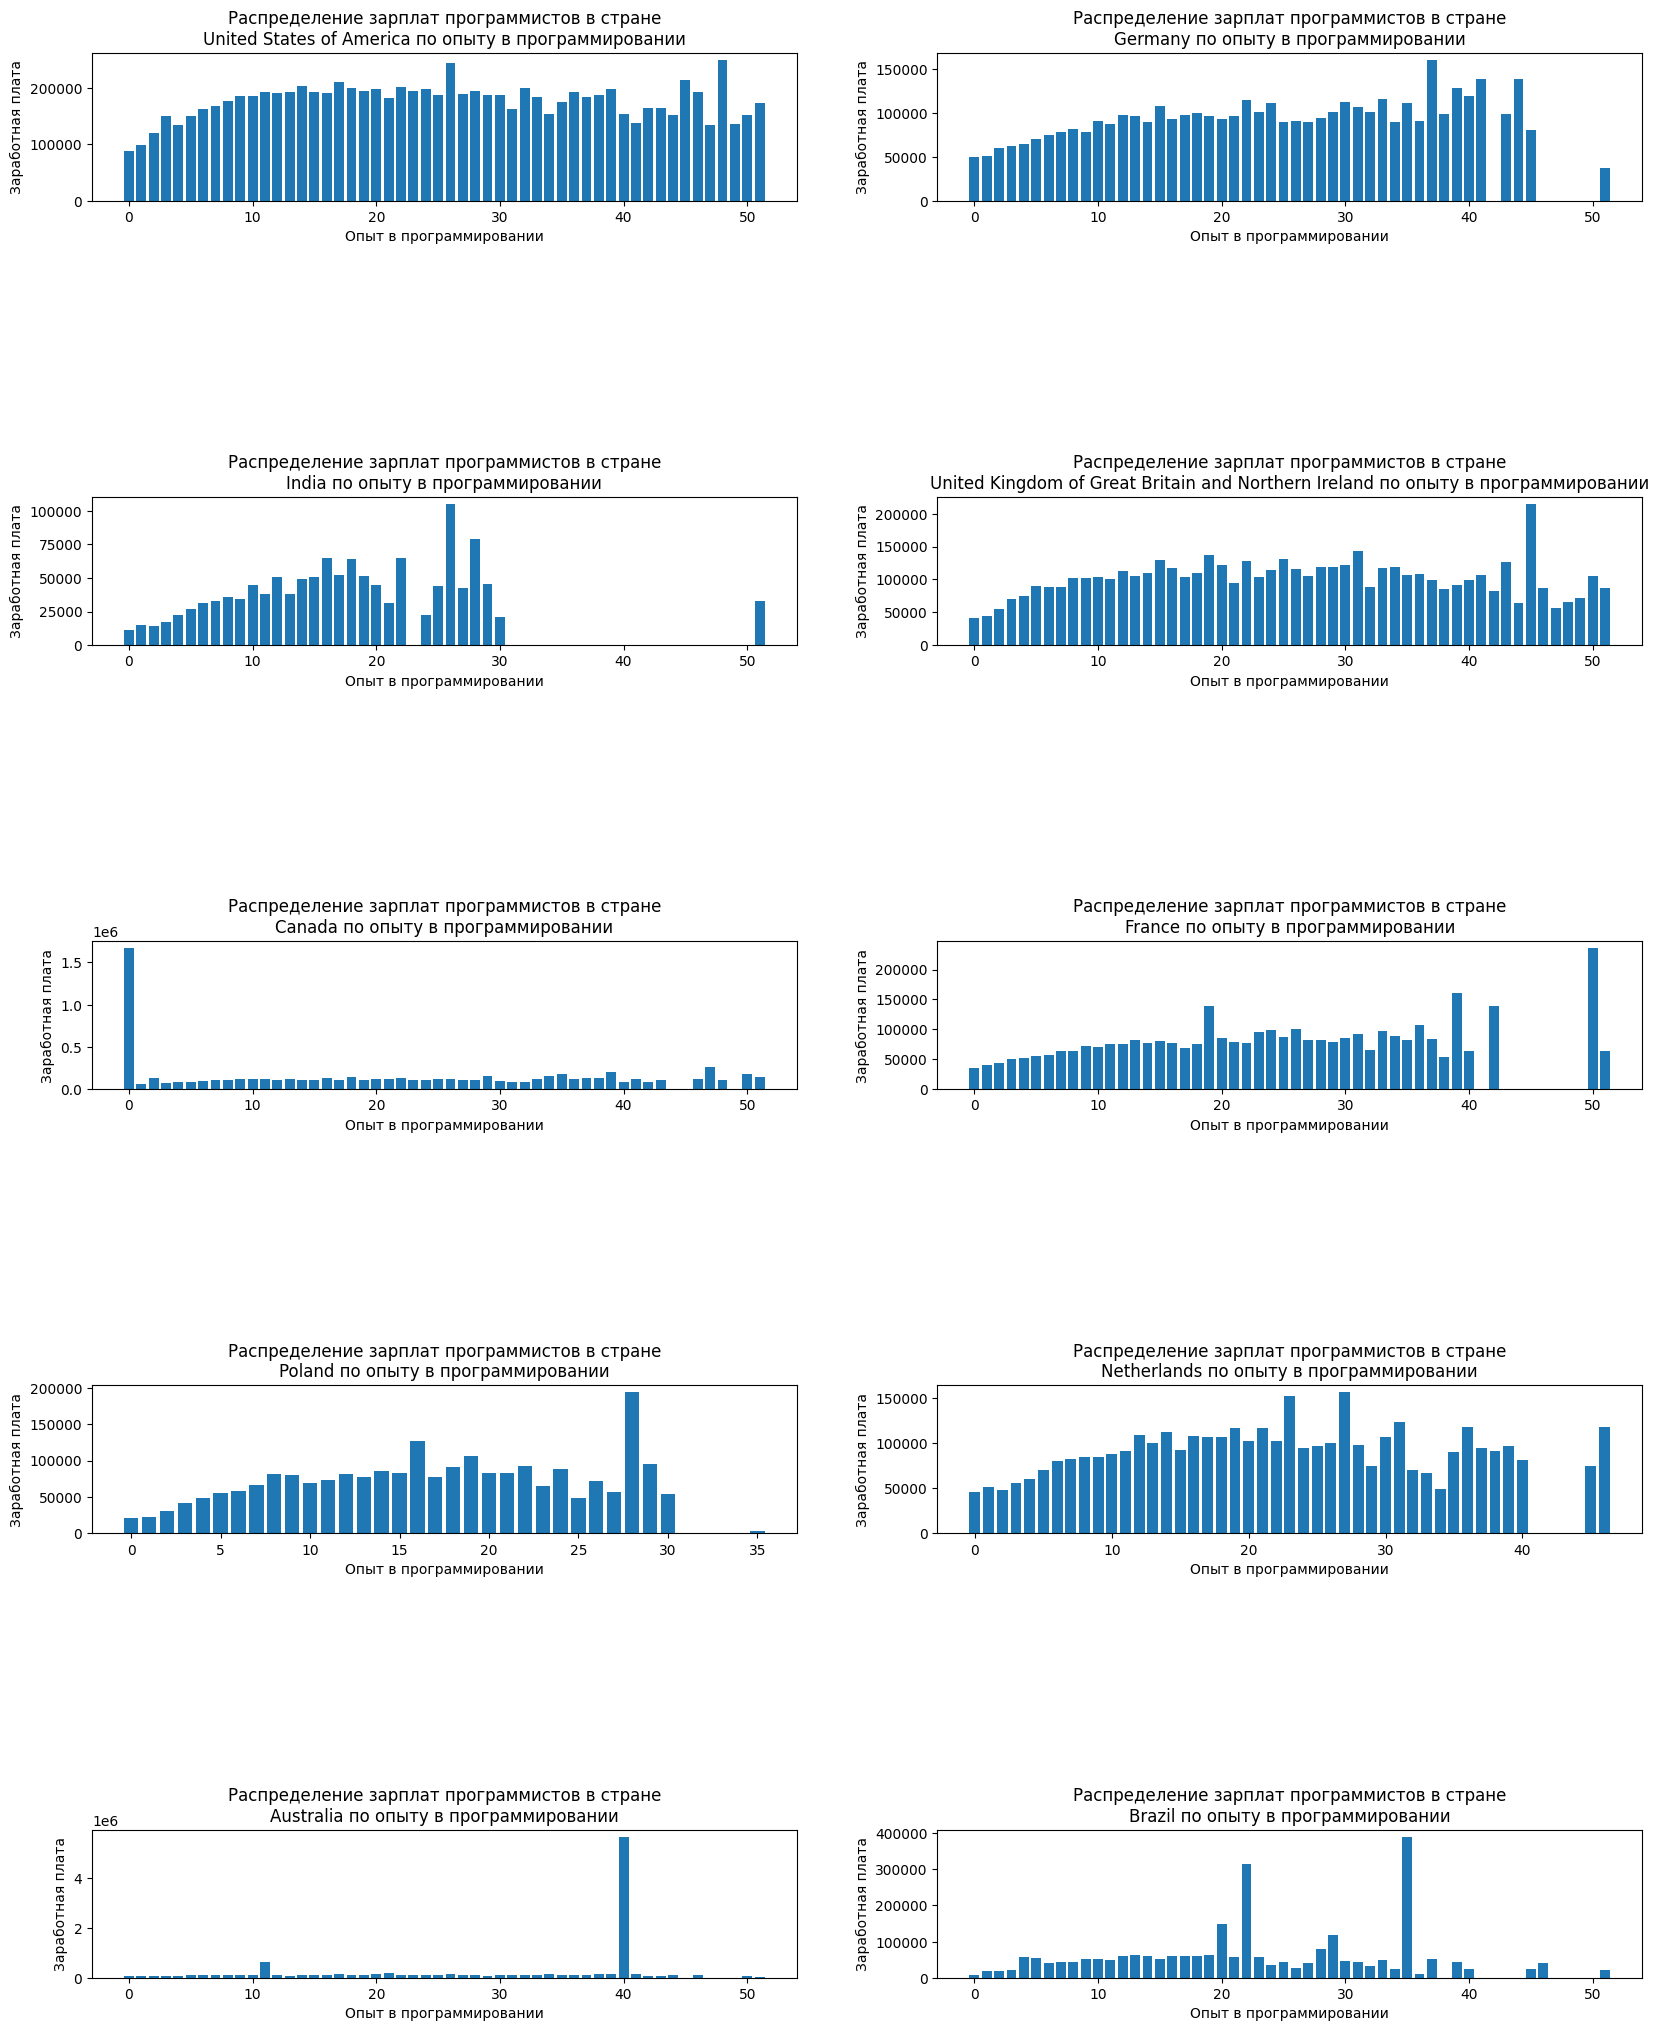

In [ ]:
# df_top10 = df_top10[df_top10["YearsCodePro"].notna()]
# df_top10["YearsCodePro"] = df_top10["YearsCodePro"].apply(lambda x:
#                                int(x) if len(x)<=2 else (0 if x == "Less than 1 year" else 51)
#                                )

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace = 2)

for i in range(10):
  plt.subplot(5, 2, i+1)
  tmp = df_top10[df_top10["Country"] == top10[i]].groupby("YearsCodePro")["ConvertedCompYearly"].mean()
  plt.bar(tmp.index, tmp)

  plt.xlabel("Опыт в программировании")
  plt.ylabel("Заработная плата")
  plt.title(f"Распределение зарплат программистов в стране\n{top10[i]} по опыту в программировании")

Здесь графики делятся на 2 типа.

Первый - страны, где идет рост зарплат с временем работы программистом. Эти графики приблизительно похожи на график $y=\sqrt{x}$, где прибавка к зарплате с каждым годом становится все меньше. Это, например, США, Германия, Великобритания.

Второй - страны с недостаточными данными. Мы видим случайные, на первый взгляд, значения на гистограмме, которые сильно выбиваются из остальных значений. Можем предположить, что в выборке недостаточно данных по людям с конкретным опытом работы. Это, например, Австралия, Бразилия, Канада

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


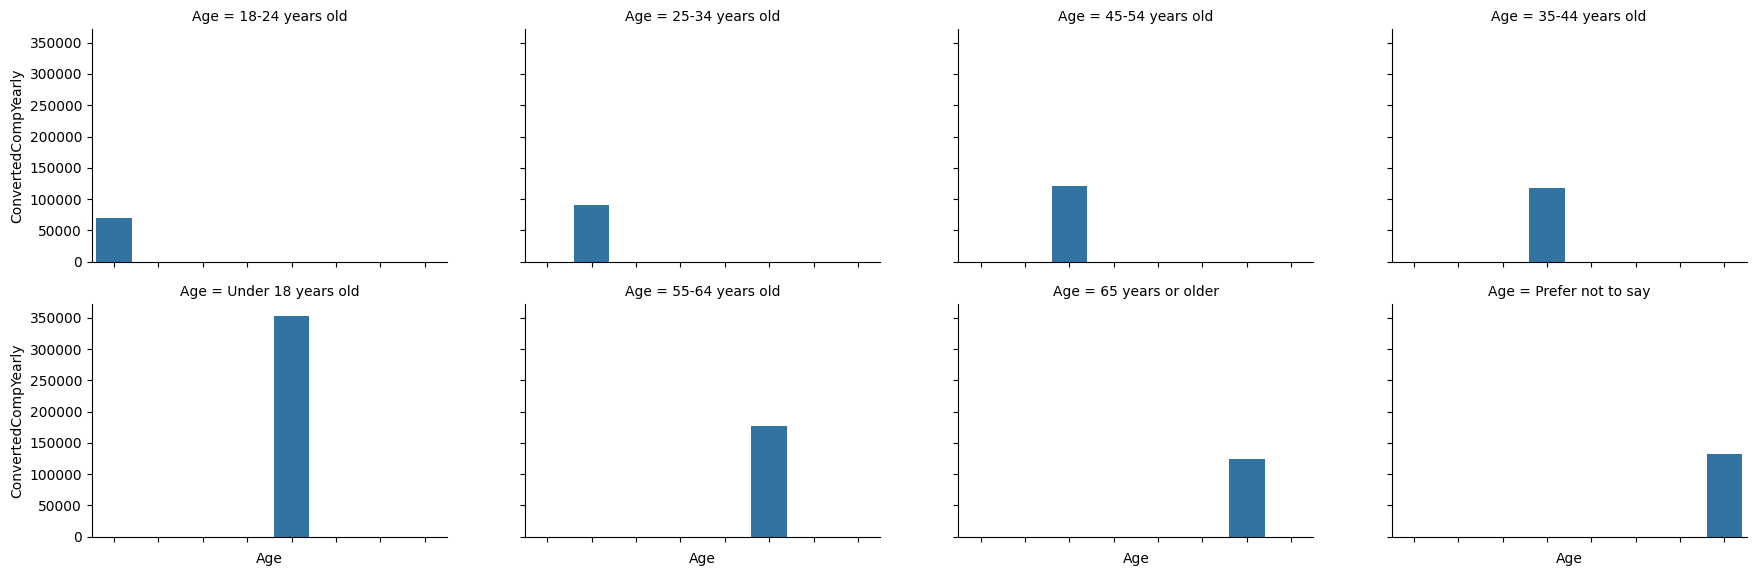

In [ ]:
g = sns.FacetGrid(df, col='Age', col_wrap=4, height=3, aspect=1.5)

# g.map(sns.barplot, 'ConvertedCompYearly')
g.map(sns.barplot, 'Age', 'ConvertedCompYearly', errorbar=None, estimator=lambda x: x.mean())
g.set_xticklabels(rotation=60)

In [ ]:
df[df["ConvertedCompYearly"].notna()].groupby("Age")["ConvertedCompYearly"].count()

,ConvertedCompYearly
Age,
18-24 years old,4922
25-34 years old,22163
35-44 years old,13848
45-54 years old,4866
55-64 years old,1795
65 years or older,339
Prefer not to say,30
Under 18 years old,56


Видим, что на представленном графике нет зависимости между возрастом и размером заработной платы.

До 18 лет средний респондент получает больше, чем любой другой средний представитель другой возрастной группы. После этого начиная с группы 18-24 лет начинается рост заработной платы с увеличением возраста вплоть до группы 55-64. После размер заработной платы снова идет вниз.

# **Анализ изменения уровня заработной платы после пандемии**

In [ ]:
df2019 = pd.read_csv("survey_results_public_2019.csv")

In [ ]:
df2020 = pd.read_csv("survey_results_public_2020.csv")
df2021 = pd.read_csv("survey_results_public_2021.csv")
df2022 = pd.read_csv("survey_results_public_2022.csv")
df2023 = DF.copy()

In [ ]:
countries = ["India","Germany","Canada","Brazil","Australia"]

countries_years = {"Year":[],"Country":[],"MedianSalary":[]}
dfs = [df2019,df2020,df2021,df2022,df2023]
for i, df_i in enumerate(dfs):
  for country in countries:
    tmp = df_i[df_i["Country"] == country]
    salary_type = "ConvertedComp" if "ConvertedComp" in df_i.columns else "ConvertedCompYearly"
    countries_years["Year"].append(2019+i)
    countries_years["Country"].append(country)
    countries_years["MedianSalary"].append(round(tmp[salary_type].median()))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


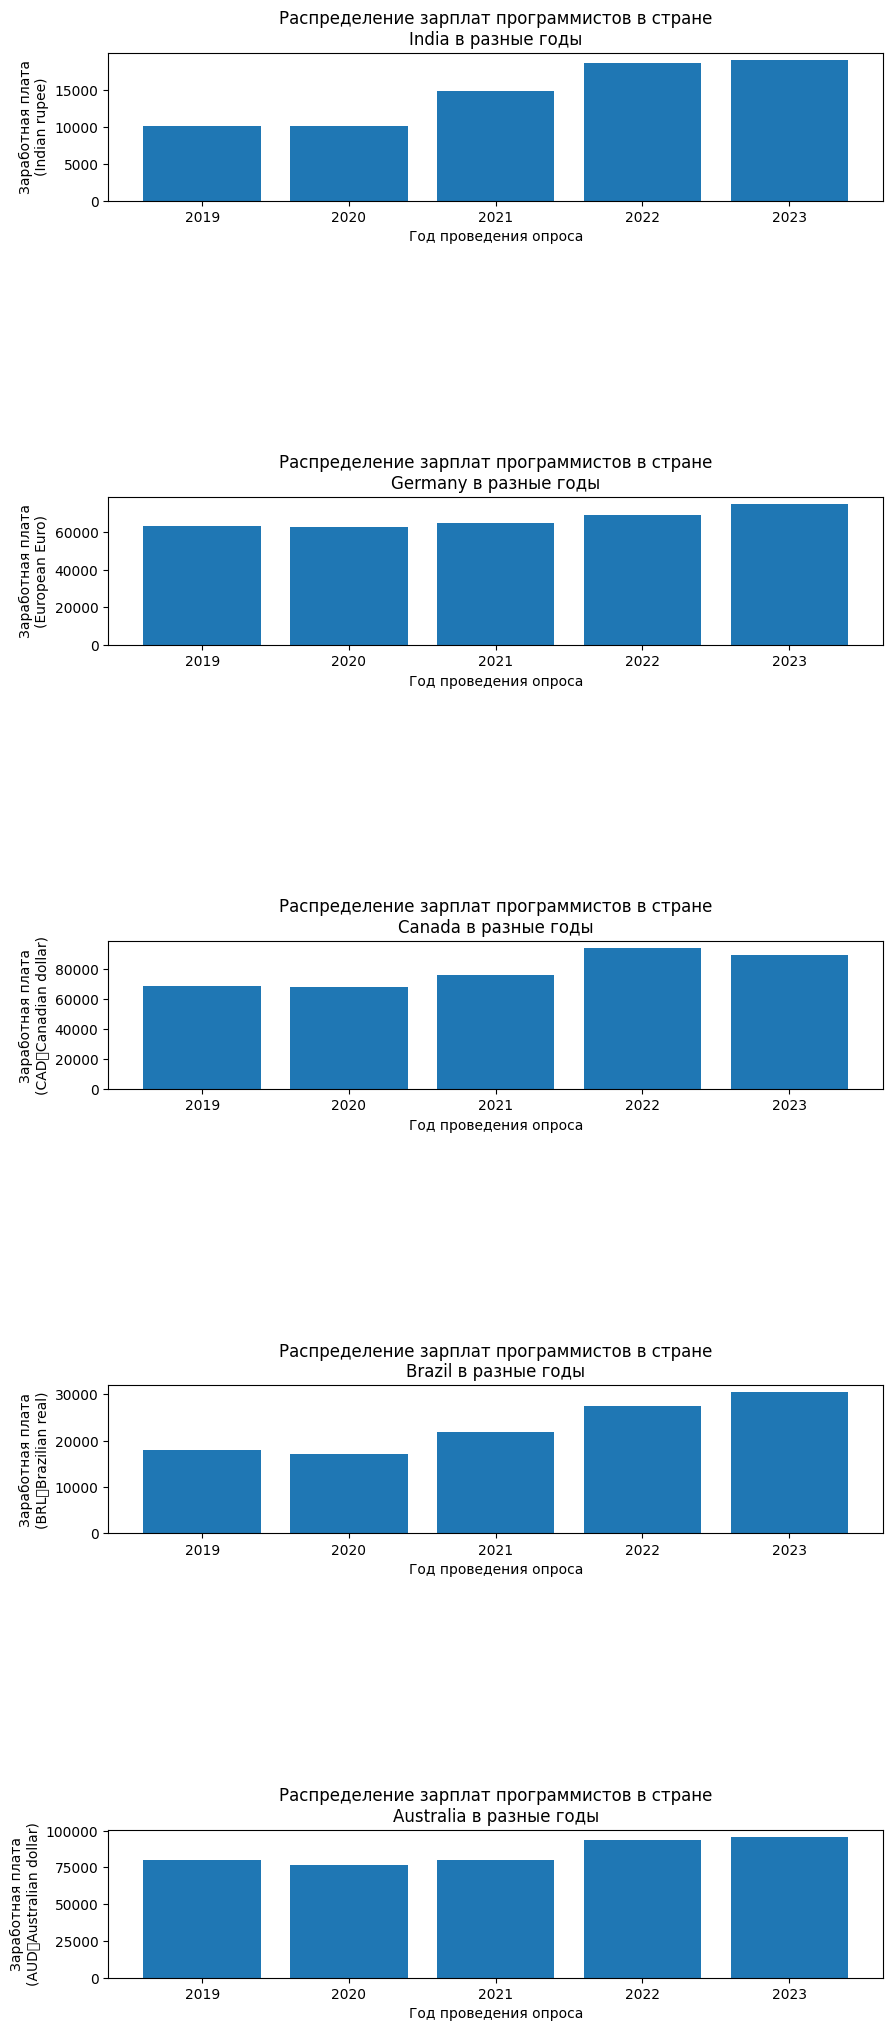

In [ ]:
df = pd.DataFrame(countries_years)

plt.figure(figsize=(10,25))
plt.subplots_adjust(hspace = 2)

for i in range(5):
  plt.subplot(5, 1, i+1)
  tmp = df[df['Country'] == countries[i]]
  plt.bar(tmp["Year"], tmp["MedianSalary"])

  currency = dfs[i][dfs[i]["Country"]==countries[i]]["CurrencyDesc"] if i<2 else dfs[i][dfs[i]["Country"]==countries[i]]["Currency"]
  currency = currency.value_counts().sort_values(ascending=False).index[0]
  plt.xlabel("Год проведения опроса")
  plt.ylabel(f"Заработная плата\n({currency})")
  plt.title(f"Распределение зарплат программистов в стране\n{countries[i]} в разные годы")

Во всех выбранных нами странах мы видим с течением времени рост средней заработной платы разрабочиков. Это связано как с инфляцией, так и с ростом IT-сектора во всем мире

Также это связано с COVID-19, потому что именно из-за пандемии люди стали работать удаленно и спрос на разработчиков вырос сразу в несколько раз. Поэтому выросла и сама заработная плата.

# **Интерпретация данных и формулирование гипотез**

Можем сделать вывод, что в некоторых странах существует тенденция роста заработной платы пропорционально увеличению стажа самого программиста. Это можно обосновать тем, что более опытный специлист более самостоятельный и стабильный сотрудник для компании, чем новичок в этой области.

Также можем заметить, что с течением времени у разработчиков растет заработная плата. Это связано с потребностью работать удаленно(COVID-19), после снятия запретов тренд на удаленную/гибридную работу остался. Это также мы видим из графиков распределения типа занятости по наличию образования. Также этому способствует расширение сектора информационных технологий по всему миру, практически в каждой стране дефицит рабочих кадров

Возраст скорее всего коррелирует с заработной платой. Это мы увидели на "карте" барчартов, где функция по заработной плате от возрастной группе не является монотонной. До 18 лет у нас лежит маленькое количество наблюдений, что увеличивает вероятность правильности нашей гипотезы

Гипотеза 1 - возраст не имеет значения, выше мы сформулировали обоснование этого тезиса

Гипотеза 2 - Для большинства респондентов верно, что опыт влияет на размер заработной платы, это также было объяснено в прошлом блоке.

Гипотеза 3 - Предпогалается, что может быть корреляция между образованием и размером заработной платы. Это можно легко проверить, построив, например, барчарт, где по оси абсцисс будут разные варианты образования, а по оси ординат - средняя з/п

Рассматриваем датасет 2023 года.

Здесь представлено множество различных параметров, которые могут потенциально влиять на размер заработной платы респондента.

Это, например - "DevType", "WorkExp", "Industry", колонки, связанные с AI. Среди них потенциально есть инсайты, потому что они описывают очень разные и притом важные факторы, которые могут на з/п.

Тип разработчика - более четкая и глубокая ниша, в которой работает респондент

Опыт - стаж работы

Индустрия - индустрия, где работает респондент. Может быть фин.тех, военные объекты, процессоры, добыча природных ресурсов и т.д.

параметры про AI - Искуственный интеллект сейчас с паразительной скоростью и масштабностью меняет мир и индустрию IT, поэтому разумно предполагать, что по результам опроса опыт взаимодействия с AI-Tools будем иметь большое значение при опредлении заработной платы

In [ ]:
df2023.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan